## EMAIL SPAM DETECTION

### Name - Sousan Nanji

### Domain - Data Science

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')



In [64]:
df=pd.read_csv('D:\Internships\CodersCave\spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [65]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [66]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [68]:
df.shape

(5171, 4)

In [69]:
df.columns
df = df.drop_duplicates()

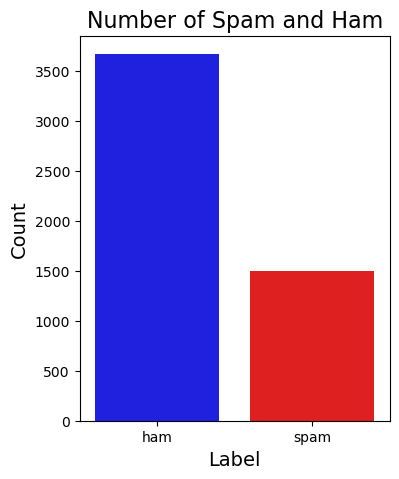

In [70]:
color= {"ham": "blue", "spam": "red"}

plt.figure(figsize=(4, 5))
sns.countplot(x='label', data=df, palette=color)

plt.title('Number of Spam and Ham', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(False)
plt.show()


# Visualizing Length of Mails

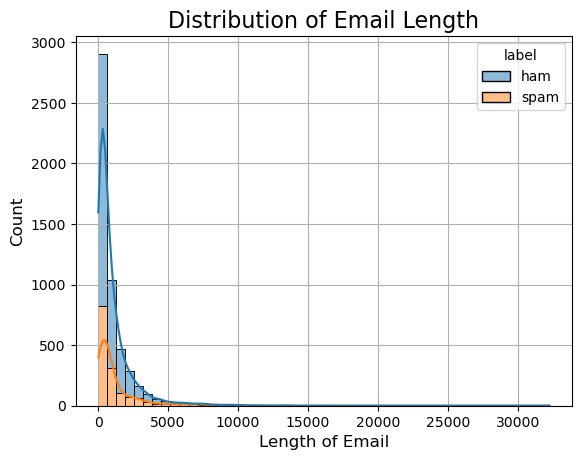

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

df['length'] = df['text'].apply(len)

sns.histplot(data=df, x='length', hue='label', multiple='stack', bins=50, kde=True)

plt.title('Distribution of Email Length', fontsize=16)
plt.xlabel('Length of Email', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.grid(True)
plt.show()


# Visualizing common words in spam and ham emails

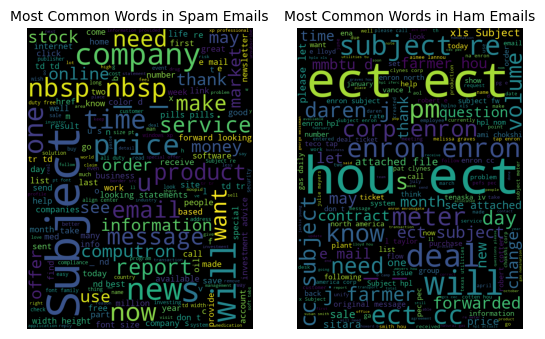

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_text = ' '.join(df[df['label'] == 'spam']['text'])
ham_text = ' '.join(df[df['label'] == 'ham']['text'])

spam_wordcloud = WordCloud(width=600, height=800, background_color='black').generate(spam_text)
ham_wordcloud = WordCloud(width=600, height=800, background_color='black').generate(ham_text)

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud,)
plt.axis('off')
plt.title('Most Common Words in Spam Emails',fontdict={'fontsize':10})

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.title('Most Common Words in Ham Emails',fontdict={'fontsize':10})

plt.show()

In [73]:
X=df['text']
X

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [74]:
y=df['label']
y

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

print(df['text'].shape)  
print(X_train.shape)
print(X_test.shape)

(5171,)
(4136,)
(1035,)


In [76]:
ppl=Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier',MultinomialNB())
])

In [77]:
ppl.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [78]:
y_pred=ppl.predict(X_test)

# Analyzing Accuracy

In [79]:
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.9710144927536232


# Assessing Precision

In [80]:
print('Precesion:',precision_score(y_test,y_pred,pos_label='spam'))

Precesion: 0.9518900343642611


# Calculating Recall

In [81]:
print('Recall;',recall_score(y_test,y_pred,pos_label='spam'))

Recall; 0.9453924914675768


# Assessing F1-Score

In [82]:
print('F1-Score:',f1_score(y_test,y_pred,pos_label='spam'))

F1-Score: 0.9486301369863014


# Visualizing Confusion Matrix

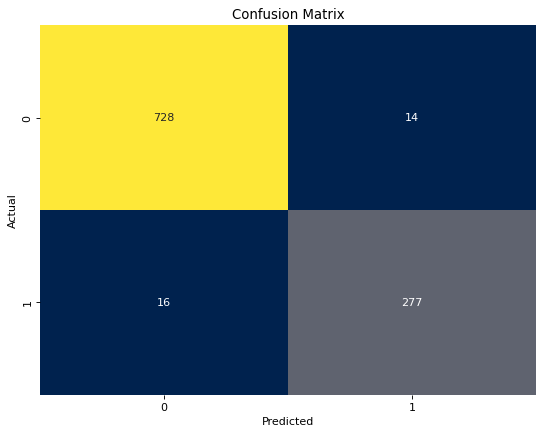

In [90]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(confm, annot=True, fmt="d", cmap="cividis", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       742
        spam       0.95      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



# Test the model

In [85]:
msg1=["Urgent! You won a million dollars! Click here to claim your prize!"]
msg2=["I'm going to the store. Do you need anything?"]
msg3=["I'm running late for work. I'll be there in 10 minutes."]

In [86]:
print(ppl.predict(msg1))
print(ppl.predict(msg3))

['spam']
['ham']
